# Breast Cancer SVM Classification

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# Add as needed

In [15]:
c = ['menopaus','agegrp', 'density', 'race', 'Hispanic','bmi', 'agefirst', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'training', 'count']
bc = pd.read_fwf('risk_rand.txt', delimiter = ' ', names = c)

In [16]:
bc.head()

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,training,count
0,0,1,1,1,0,1,0,0,0,0,9,9,0,0,1,3
1,0,1,1,1,0,1,0,0,0,9,9,9,0,0,0,2
2,0,1,1,1,0,1,0,0,0,9,9,9,0,0,1,3
3,0,1,1,1,0,1,1,0,0,0,9,9,0,0,1,1
4,0,1,1,1,0,1,1,0,1,9,9,9,0,0,1,1


In [17]:
bc.isnull().sum()

menopaus    0
agegrp      0
density     0
race        0
Hispanic    0
bmi         0
agefirst    0
nrelbc      0
brstproc    0
lastmamm    0
surgmeno    0
hrt         0
invasive    0
cancer      0
training    0
count       0
dtype: int64

In [18]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181903 entries, 0 to 181902
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   menopaus  181903 non-null  int64
 1   agegrp    181903 non-null  int64
 2   density   181903 non-null  int64
 3   race      181903 non-null  int64
 4   Hispanic  181903 non-null  int64
 5   bmi       181903 non-null  int64
 6   agefirst  181903 non-null  int64
 7   nrelbc    181903 non-null  int64
 8   brstproc  181903 non-null  int64
 9   lastmamm  181903 non-null  int64
 10  surgmeno  181903 non-null  int64
 11  hrt       181903 non-null  int64
 12  invasive  181903 non-null  int64
 13  cancer    181903 non-null  int64
 14  training  181903 non-null  int64
 15  count     181903 non-null  int64
dtypes: int64(16)
memory usage: 22.2 MB


<AxesSubplot:>

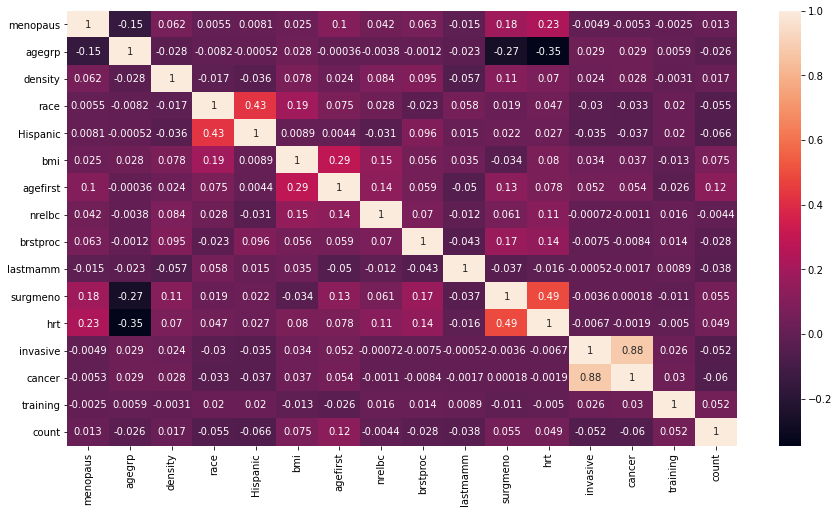

In [19]:
# Features
# column 1-13
plt.figure(figsize = (15,8) )
sns.heatmap(bc.corr(), annot=True)

Text(0.5, 1.0, 'Age Distribution')

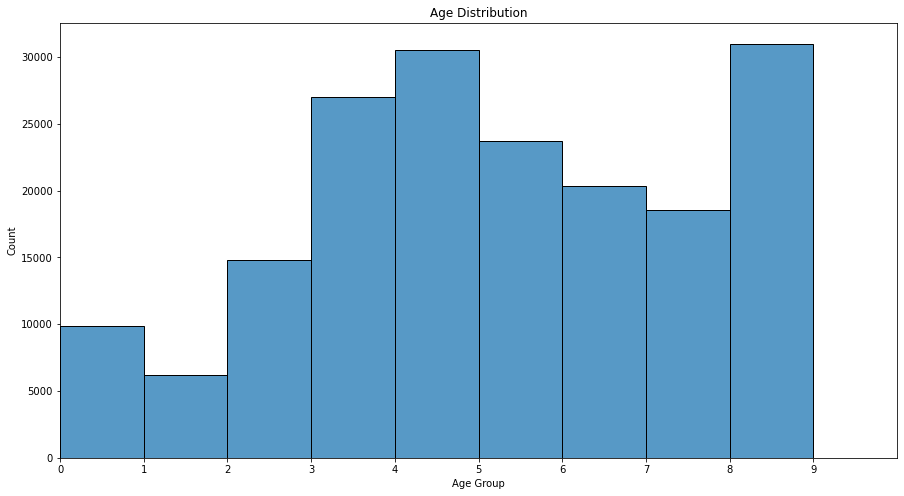

In [20]:
plt.figure(figsize = (15,8) )
sns.histplot(bc['agegrp'],binwidth = 1)
plt.xlabel('Age Group')
plt.xlim(0,10)
plt.xticks(range(0,10))
plt.ylabel('Count')
plt.title('Age Distribution')

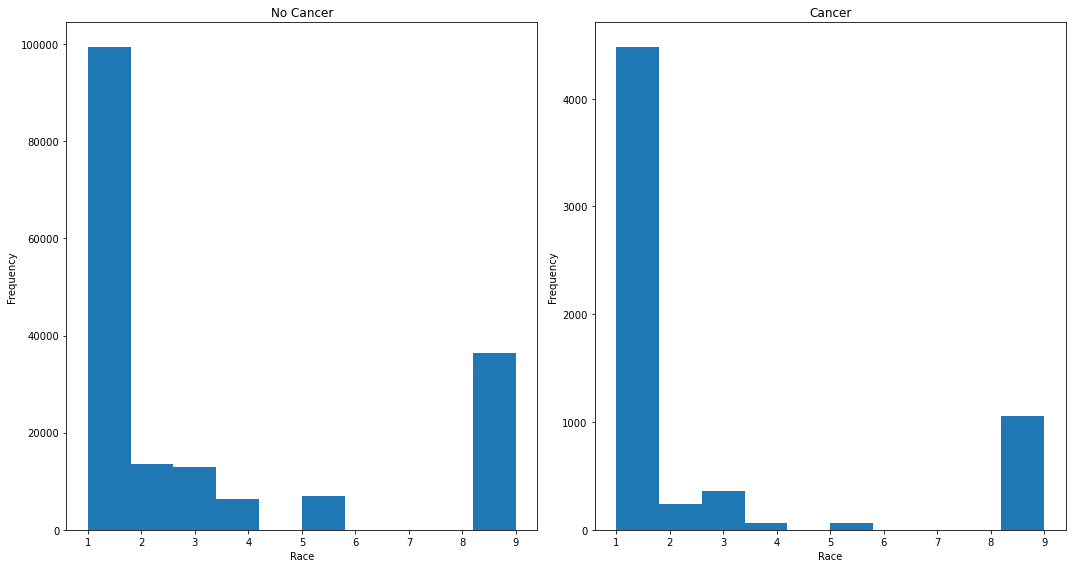

In [21]:
Cancer0 = bc[bc['cancer'] == 0]
Cancer1 = bc[bc['cancer'] == 1]

plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.hist(Cancer0['race']);
plt.title('No Cancer')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['race']);
plt.title('Cancer')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.tight_layout()

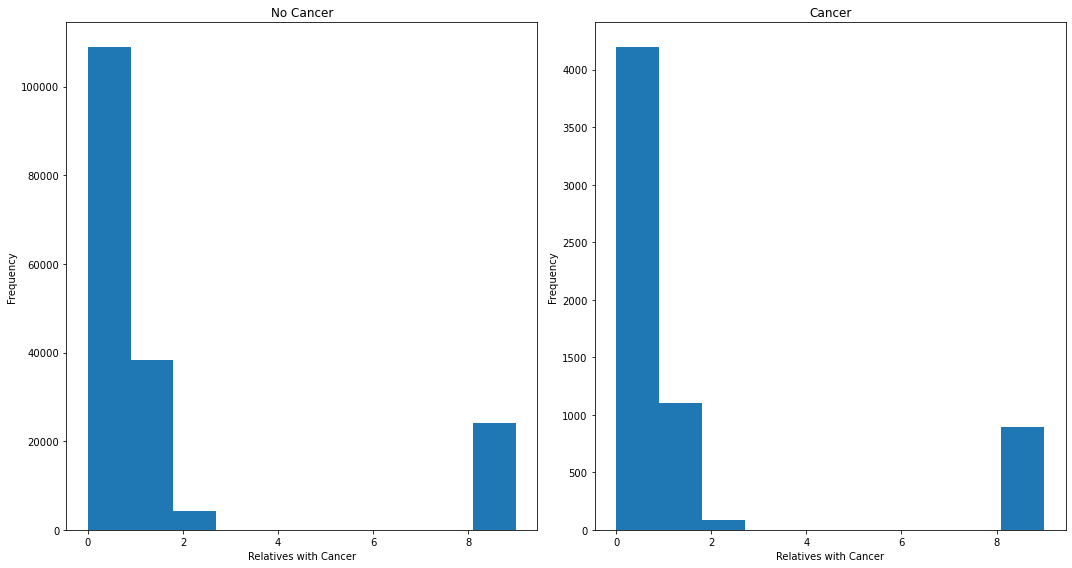

In [22]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.hist(Cancer0['nrelbc']);
plt.title('No Cancer')
plt.xlabel('Relatives with Cancer')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['nrelbc']);
plt.title('Cancer')
plt.xlabel('Relatives with Cancer')
plt.ylabel('Frequency')
plt.tight_layout()

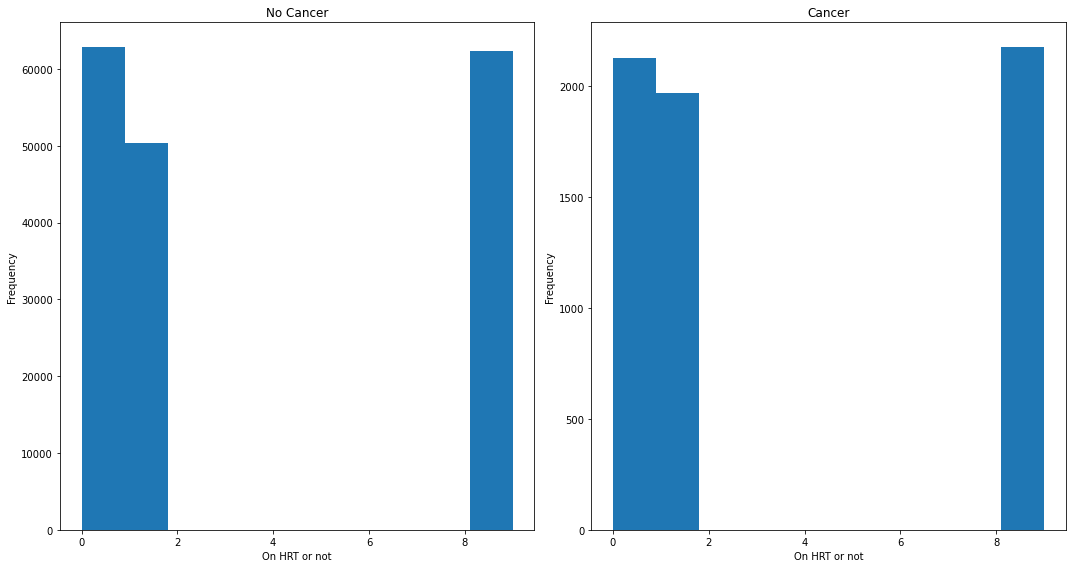

In [23]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.hist(Cancer0['hrt']);
plt.title('No Cancer')
plt.xlabel('On HRT or not')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['hrt']);
plt.title('Cancer')
plt.xlabel('On HRT or not')
plt.ylabel('Frequency')
plt.tight_layout()

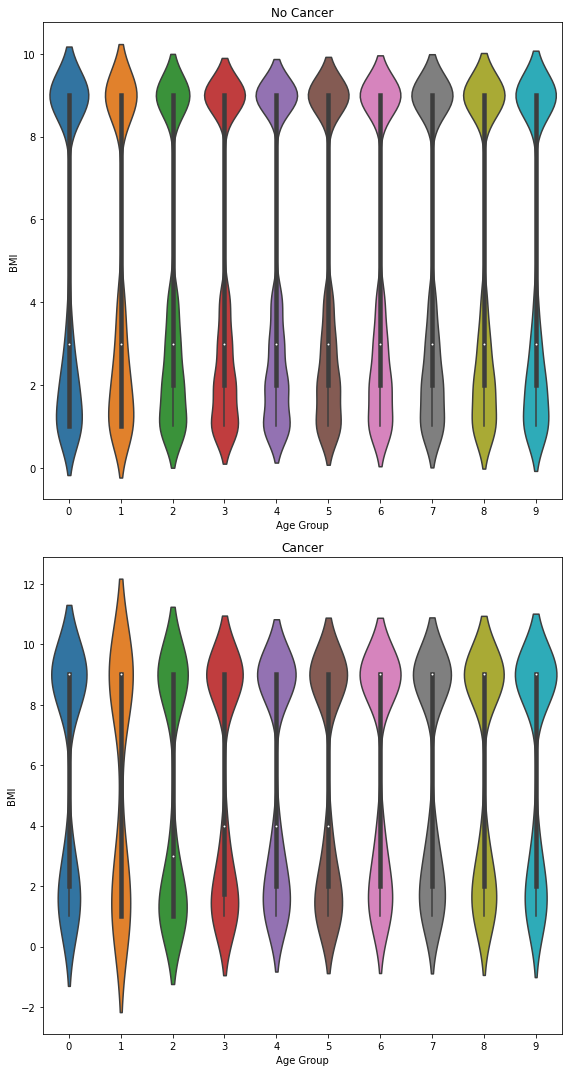

In [24]:

plt.figure(figsize = (8,15))
plt.subplot(2,1,1)
sns.violinplot(x = 'agegrp', y = 'bmi', data = Cancer0)
plt.title('No Cancer')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.subplot(2,1,2)
sns.violinplot(x = 'agegrp', y = 'bmi', data = Cancer1)
plt.title('Cancer')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.tight_layout()

In [25]:
bc.columns

Index(['menopaus', 'agegrp', 'density', 'race', 'Hispanic', 'bmi', 'agefirst',
       'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive',
       'cancer', 'training', 'count'],
      dtype='object')

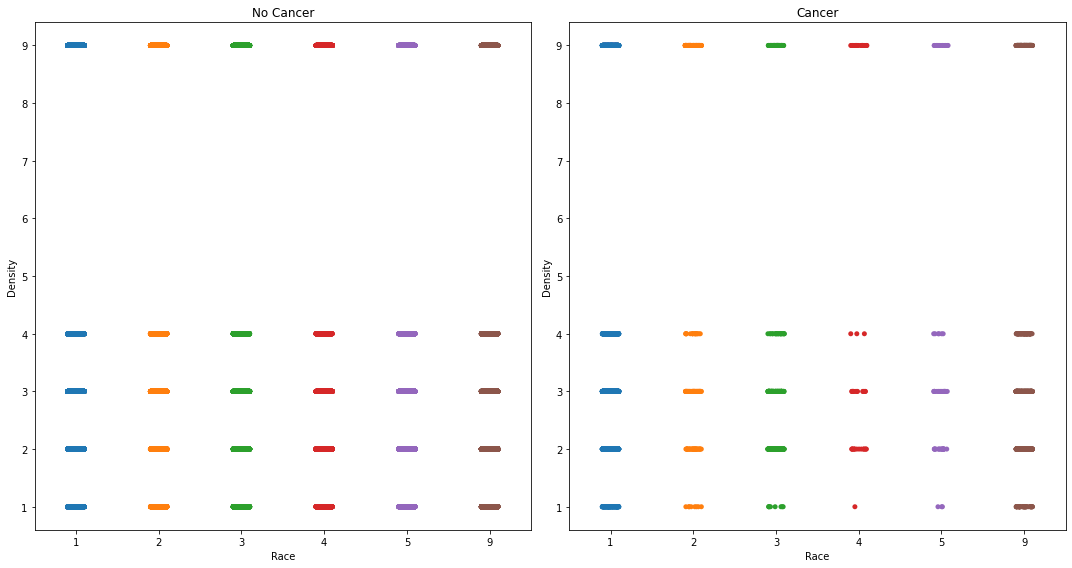

In [26]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.stripplot(x = 'race', y = 'density', data = Cancer0, jitter = True)
plt.xlabel('Race')
plt.ylabel('Density')
plt.title('No Cancer')

plt.subplot(1,2,2)
sns.stripplot(x = 'race', y = 'density', data = Cancer1, jitter = True)
plt.xlabel('Race')
plt.ylabel('Density')
plt.title('Cancer')
plt.tight_layout()

# Linear Regression 

In [27]:
x = bc['invasive'].values
y = bc['cancer'].values

x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()
print("Intercept and slope are:", results.params)


Intercept and slope are: [0.00769531 0.99230469]


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 6.334e+05
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:07:06   Log-Likelihood:             1.8776e+05
No. Observations:              181903   AIC:                        -3.755e+05
Df Residuals:                  181901   BIC:                        -3.755e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.000     37.558      0.000       0.007       0.008
x1             0.9923      0.001    795.859      0.000       0.990       0.995
==============================================================================
Omnibus:                   298845.609   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        129123057.695
Skew:                          11.423   Prob(JB):                         0.00
Kurtosis:                     131.508   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model

In [29]:

linmodel = sm.OLS.from_formula('cancer ~ agegrp + bmi + nrelbc + hrt + invasive + race', data = bc)
linmodel = linmodel.fit()
print(linmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 cancer   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 1.057e+05
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:07:07   Log-Likelihood:             1.8782e+05
No. Observations:              181903   AIC:                        -3.756e+05
Df Residuals:                  181896   BIC:                        -3.756e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0047      0.001      7.519      0.0

# Multiple Regression

In [30]:
Multiple = bc.drop(['count','training' ], axis = 1)
X = Multiple.drop(['cancer'], axis = 1)


Y = Multiple['cancer']

model2 = sm.OLS(Y, X)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 cancer   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                          5.104e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:07:08   Log-Likelihood:                      1.8787e+05
No. Observations:              181903   AIC:                                 -3.757e+05
Df Residuals:                  181890   BIC:                                 -3.756e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

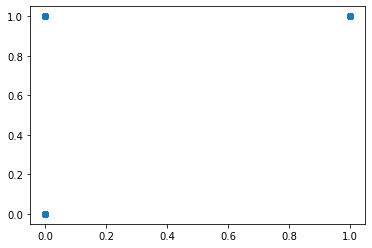

In [31]:
plt.scatter(bc['invasive'], bc['cancer'])


# Building the SVM

In [33]:
# Supervised SVM 

# Getting rid of the columns that have likely no effect on whether someone has cancer or not.
bc_svm = bc.drop(['count','training' ], axis = 1)

# X is a dataframe of all the features (independent variables)
# The dependent variable is dropped
X = bc_svm.drop(['cancer'], axis = 1)
# Y is the dataframe of the dependent variable
Y = bc_svm['cancer']

# Splitting the data into train and test features and labels respectively
# Proportion of data set to testing data is 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Now we initialize a variable that is the SVM linear classifier model
clf = svm.SVC(kernel = 'linear')
# Now we fit the SVM to the training set
clf.fit(X_train, Y_train)

# Now we want our svm to predict whether or not someone has breast cancer from our testing data, using our trained SVM
Y_pred = clf.predict(X_test)


# Checking to see how our SVM measured up against the True data
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))



Accuracy: 0.9927434649954646


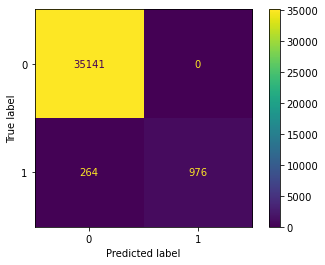

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
# Now we can see the True Positives, False Positives, True Negatives, and False Negatives.
# Top right (True Negatives), Top left (False Negative), Bottom Right (False Positive), Bottom Left (True Positive)

In [35]:
# Printing the confusion matrix without the visualization
print(cm)

[[35141     0]
 [  264   976]]


In [28]:
# Supervised svm

# Here we decide to see if another SVM model is better, so we choose rbf
clf1 = svm.SVC(kernel = 'rbf')

# Fitting the SVM to the data
clf1.fit(X_train, Y_train)

# Predicting whether or not someone has cancer using the rbf model on the test features
Y_pred1 = clf1.predict(X_test)

# Checking the accuracy of our new predictions with the true values
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred1))


Accuracy: 0.9927434649954646


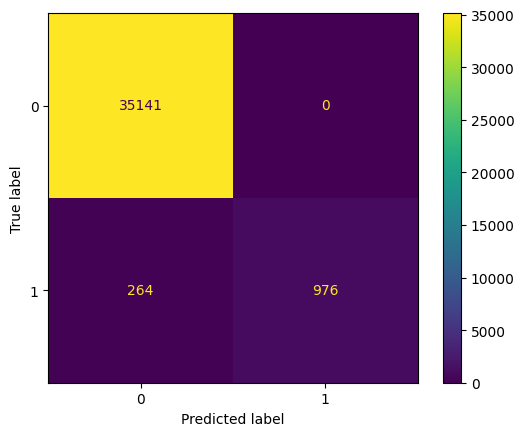

In [29]:
# Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred1)

# The outputs are identical to the ones above, likely because the rbf reduced to a linear classifier since that was sufficient.
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf1.classes_)
disp.plot()

In [30]:
# Model performance summary

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred1))

# 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     35141
           1       1.00      0.79      0.88      1240

    accuracy                           0.99     36381
   macro avg       1.00      0.89      0.94     36381
weighted avg       0.99      0.99      0.99     36381



For both the kernels (rbf and linear) the svm tends to have a similar performance. The following things can be done to improve the SVM performance:

1. Using feature engineering to select or create more appropriate features that better help capture the underlying patterns
2. Use cross validation for finding optimal hyperparameters

Since the rbf took 5 minutes to run and the linear took 30seconds to a minute

THe BMI column has a lot of missing values (9), so there are limitations in our data